<img src ='Customer-Segmentation.jpg' style='width"5px ; hight:5px'>

# <span style='color:Green'> Import Libraries.  </span>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import re
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn import datasets
from scipy import stats
from matplotlib.pyplot import figure
from sklearn.ensemble import GradientBoostingClassifier
#from mpl_toolkits import mplot3d
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=DeprecationWarning)
#warnings.simplefilter(action='ignore', category=RuntimeWarning)

## <span style='background :White' > <span style='color:Green'> Read Data  </span> </span>

In [2]:
df = pd.read_csv(r"D:\Data Science\Data\Final project banck segmentation\bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.0
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.5


In [3]:
df.shape

(1048567, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [6]:
df.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

### <span style='background :White' > <span style='color:Green'> Data Cleaning </span> </span>

In [7]:
df.drop(df.columns[[7]], axis=1, inplace=True )
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,25.0
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,1762.5


In [8]:
print(df['CustGender'].value_counts())
print(df[(df['CustGender']== 'T')])

M    765530
F    281936
T         1
Name: CustGender, dtype: int64
       TransactionID CustomerID CustomerDOB CustGender CustLocation  \
959987       T959988   C3380368    1/1/1800          T      CHENNAI   

        CustAccountBalance TransactionDate  TransactionAmount (INR)  
959987             50050.0       10/9/2016                  32500.0  


In [9]:
df.drop(df.index[959987] , axis=0 , inplace=True)
df.CustGender.value_counts()

M    765530
F    281936
Name: CustGender, dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionAmount (INR)    0
dtype: int64

In [13]:
df.shape

(1041613, 8)

In [14]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'] , dayfirst=True)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'] , dayfirst=True)

#### Calculate The Age

In [15]:
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

In [16]:
df.head(20)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,25.00,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,27999.00,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,459.00,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,2060.00,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50,28
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,676.00,44
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,566.00,24
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,148.00,34
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,833.00,28
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,289.11,32


In [17]:
indexAge = df[(df['Age'] <= 20)].index
df.drop(indexAge,inplace=True)
df.head(20)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,25.00,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,27999.00,59
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,2060.00,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50,28
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,676.00,44
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,566.00,24
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,148.00,34
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,833.00,28
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,289.11,32
10,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2016-08-02,259.00,34


In [18]:
indexAge1 = df[(df['Age'] >= 100)].index
df.drop(indexAge1,inplace=True)
df.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,25.00,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,27999.00,59
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,2060.00,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50,28
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,676.00,44
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-08-02,566.00,24
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-08-02,148.00,34
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-08-02,833.00,28
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-08-02,289.11,32
10,T11,C5430833,1982-07-22,M,MOHALI,48429.49,2016-08-02,259.00,34


In [19]:
df.shape

(915961, 9)

In [20]:
df['CustGender'].replace(['F'], 0 ,inplace=True)
df['CustGender'].replace(['M'], 1 ,inplace=True)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,0,JAMSHEDPUR,17819.05,2016-08-02,25.0,22
1,T2,C2142763,1957-04-04,1,JHAJJAR,2270.69,2016-08-02,27999.0,59
3,T4,C5342380,1973-09-14,0,MUMBAI,866503.21,2016-08-02,2060.0,43
4,T5,C9031234,1988-03-24,0,NAVI MUMBAI,6714.43,2016-08-02,1762.5,28
5,T6,C1536588,1972-10-08,0,ITANAGAR,53609.20,2016-08-02,676.0,44


In [21]:
df['CustomerID'].value_counts()

C6735477    6
C6624352    6
C1026833    6
C6222360    6
C1736254    6
           ..
C2426484    1
C8823888    1
C1741444    1
C5315354    1
C6420483    1
Name: CustomerID, Length: 788502, dtype: int64

In [22]:
df['Pre_Recency'] = df ['TransactionDate'] 
df['FirstDateCustVisitBanck'] = df ['TransactionDate']

### Extract The Important Data

####  RECENCY FREQUENCY MONETARY
##### RFM

In [23]:
RFM_df = df.groupby('CustomerID').agg({'TransactionID':'count' , 'CustomerDOB':'median' , 'CustGender':'first' , 'CustLocation':'first' , 'CustAccountBalance':'mean' , 
                                       'TransactionAmount (INR)':'mean' ,'Age' :'first' , 'Pre_Recency':'max' , 'FirstDateCustVisitBanck':'min'})

RFM_df.head()

,TransactionID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,Pre_Recency,FirstDateCustVisitBanck
CustomerID,,,,,,,,,
C1010011,2,1988-02-11,0,NOIDA,76340.635,2553.0,24,2016-09-26,2016-08-09
C1010012,1,1994-07-28,1,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14
C1010014,2,1988-07-12,0,MUMBAI,100112.950,727.5,24,2016-08-07,2016-08-01
C1010018,1,1990-05-29,0,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15
C1010028,1,1988-08-25,0,DELHI,296828.370,557.0,28,2016-08-29,2016-08-29


In [24]:
RFM_df.shape

(788502, 9)

In [25]:
RFM_df ['Recency'] = RFM_df ['Pre_Recency'] - RFM_df['FirstDateCustVisitBanck']

In [26]:
RFM_df['Recency']=RFM_df['Recency'].astype(str)

In [27]:
RFM_df.head()

,TransactionID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,Pre_Recency,FirstDateCustVisitBanck,Recency
CustomerID,,,,,,,,,,
C1010011,2,1988-02-11,0,NOIDA,76340.635,2553.0,24,2016-09-26,2016-08-09,48 days
C1010012,1,1994-07-28,1,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,0 days
C1010014,2,1988-07-12,0,MUMBAI,100112.950,727.5,24,2016-08-07,2016-08-01,6 days
C1010018,1,1990-05-29,0,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,0 days
C1010028,1,1988-08-25,0,DELHI,296828.370,557.0,28,2016-08-29,2016-08-29,0 days


In [28]:
RFM_df ['Recency'] = RFM_df ['Recency'].apply(lambda x :re.search('\d+', x ).group())
RFM_df['Recency']=RFM_df['Recency'].astype(int)

In [29]:
RFM_df.head()

,TransactionID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,Pre_Recency,FirstDateCustVisitBanck,Recency
CustomerID,,,,,,,,,,
C1010011,2,1988-02-11,0,NOIDA,76340.635,2553.0,24,2016-09-26,2016-08-09,48
C1010012,1,1994-07-28,1,MUMBAI,24204.490,1499.0,22,2016-08-14,2016-08-14,0
C1010014,2,1988-07-12,0,MUMBAI,100112.950,727.5,24,2016-08-07,2016-08-01,6
C1010018,1,1990-05-29,0,CHAMPARAN,496.180,30.0,26,2016-09-15,2016-09-15,0
C1010028,1,1988-08-25,0,DELHI,296828.370,557.0,28,2016-08-29,2016-08-29,0


In [30]:
RFM_df.rename(columns={"TransactionID":"Frequency"},inplace=True)

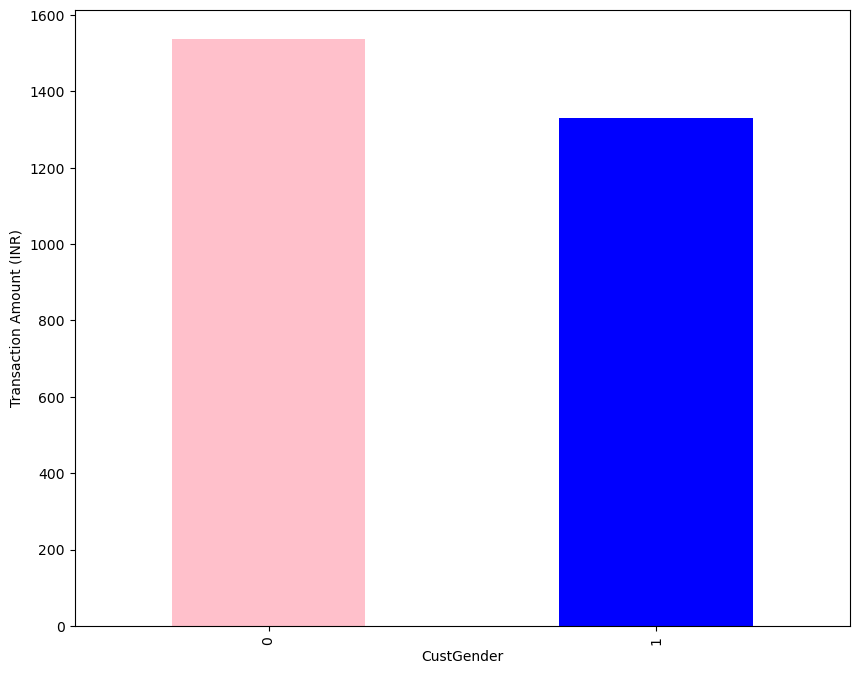

In [31]:
fig = plt.figure(figsize= (10,8))
ax = df.groupby('CustGender')['TransactionAmount (INR)'].mean().plot(kind='bar',color=['pink','blue'])
plt.ylabel('Transaction Amount (INR)')
plt.show()

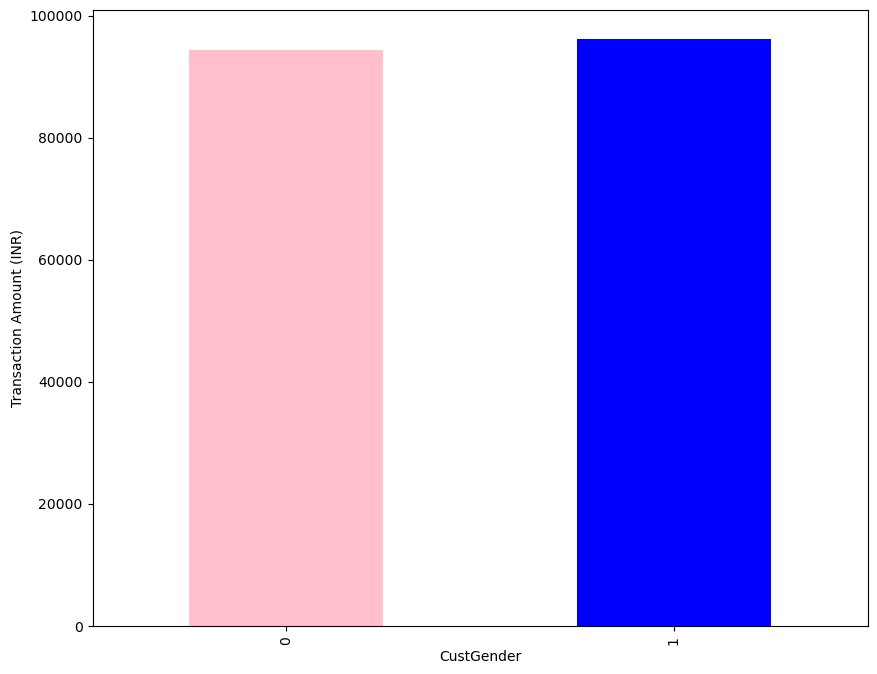

In [32]:
fig = plt.figure(figsize= (10,8))
ax = df.groupby('CustGender')['CustAccountBalance'].mean().plot(kind='bar',color=['pink','blue'])
plt.ylabel('Transaction Amount (INR)')
plt.show()

In [33]:
RFM_df.describe()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),Age,Recency
count,788502.000000,788502.000000,7.885020e+05,7.885020e+05,788502.000000,788502.000000
mean,1.161647,0.722769,9.564446e+04,1.389577e+03,30.248500,2.628192
std,0.417920,0.447632,7.090802e+05,5.809242e+03,7.168389,8.083601
min,1.000000,0.000000,0.000000e+00,0.000000e+00,21.000000,0.000000
25%,1.000000,0.000000,5.261370e+03,1.750425e+02,25.000000,0.000000
50%,1.000000,1.000000,1.715387e+04,4.573000e+02,29.000000,0.000000
75%,1.000000,1.000000,5.457242e+04,1.127000e+03,33.000000,0.000000
max,6.000000,1.000000,1.150355e+08,1.560035e+06,86.000000,81.000000


In [34]:
RFM_df.corr()

C:\Users\Heba\AppData\Local\Temp\ipykernel_19812\3435804464.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  RFM_df.corr()


,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),Age,Recency
Frequency,1.000000,-0.001305,-0.000104,-0.000585,0.001111,0.794123
CustGender,-0.001305,1.000000,0.000455,-0.013711,0.055715,-0.001846
CustAccountBalance,-0.000104,0.000455,1.000000,0.055528,0.109975,-0.000417
TransactionAmount (INR),-0.000585,-0.013711,0.055528,1.000000,0.087613,-0.000561
Age,0.001111,0.055715,0.109975,0.087613,1.000000,0.000169
Recency,0.794123,-0.001846,-0.000417,-0.000561,0.000169,1.000000


In [35]:
RFM_df.drop(columns=['CustomerDOB', 'CustLocation','Pre_Recency', 'FirstDateCustVisitBanck'], axis= 0 ,inplace=True)

In [36]:
RFM_df.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),Age,Recency
CustomerID,,,,,,
C1010011,2,0,76340.635,2553.0,24,48
C1010012,1,1,24204.490,1499.0,22,0
C1010014,2,0,100112.950,727.5,24,6
C1010018,1,0,496.180,30.0,26,0
C1010028,1,0,296828.370,557.0,28,0


In [37]:
RFM_df.dtypes

Frequency                    int64
CustGender                   int64
CustAccountBalance         float64
TransactionAmount (INR)    float64
Age                          int64
Recency                      int32
dtype: object

## <span style='background :White' > <span style='color:Green'> Feature Engineering  </span> </span>

In [38]:
sc = StandardScaler(copy=True , with_mean=True , with_std= True)
RFM_df_sc = sc.fit_transform (RFM_df)
df_scaled = pd.DataFrame(RFM_df_sc , columns = RFM_df.columns)
df_scaled=df_scaled.sample(n=10000,random_state=0).reset_index(drop=True)
df_scaled.head()

,Frequency,CustGender,CustAccountBalance,TransactionAmount (INR),Age,Recency
0,-0.386789,-1.614653,-0.134697,-0.153304,-1.011176,-0.325127
1,-0.386789,0.619328,-0.126800,-0.233004,-0.871675,-0.325127
2,2.006012,0.619328,-0.120569,-0.182912,-0.174168,1.283069
3,-0.386789,-1.614653,-0.133355,-0.226119,-0.871675,-0.325127
4,-0.386789,0.619328,-0.129823,-0.153131,0.662841,-0.325127


In [39]:
df_scaled.shape

(10000, 6)

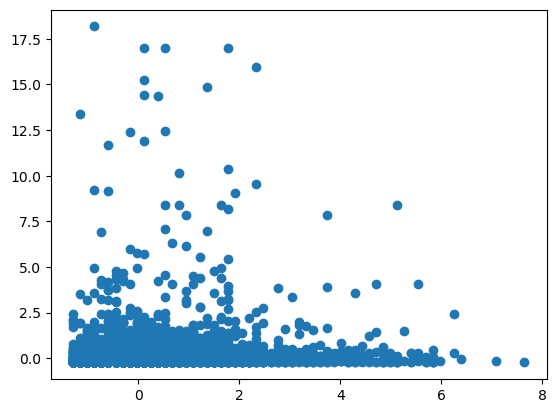

In [40]:
plt.scatter(x = df_scaled['Age'] , y = df_scaled['TransactionAmount (INR)'])

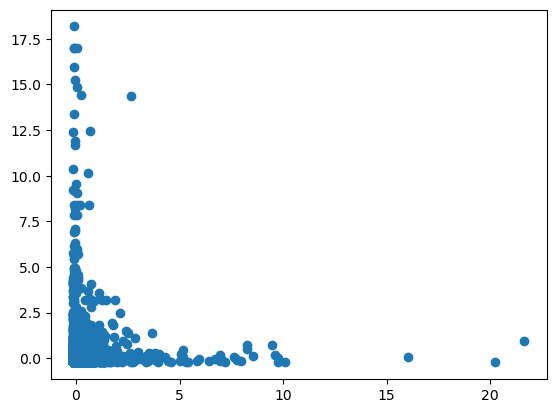

In [42]:
plt.scatter(x = df_scaled['CustAccountBalance'] , y = df_scaled['TransactionAmount (INR)'])

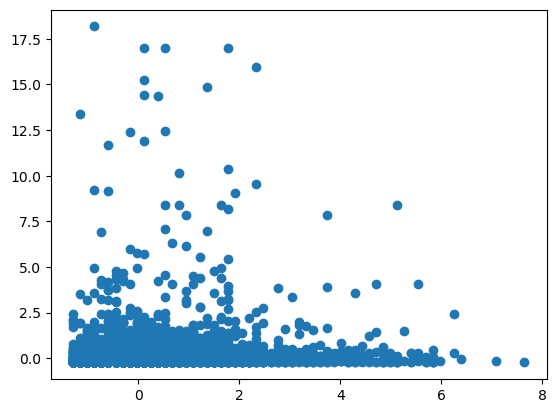

In [43]:
plt.scatter(x =df_scaled['Age'] , y=df_scaled['TransactionAmount (INR)'])

<Axes: xlabel='Frequency', ylabel='CustAccountBalance'>

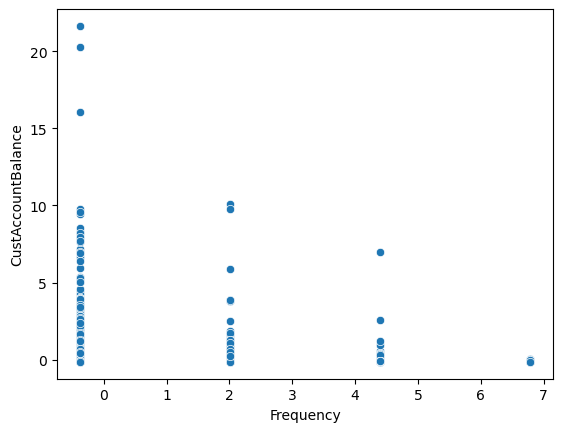

In [44]:
sns.scatterplot (x =df_scaled['Frequency'] , y=df_scaled['CustAccountBalance'])

## <span style='background :White' > <span style='color:Green'> Modelling  </span> </span>

In [45]:
RFM_df = RFM_df.sample(n=10000,random_state=0).reset_index(drop=True)

c:\Users\Heba\anaconda3\envs\heba\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Heba\anaconda3\envs\heba\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Heba\anaconda3\envs\heba\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Heba\anaconda3\envs\heba\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

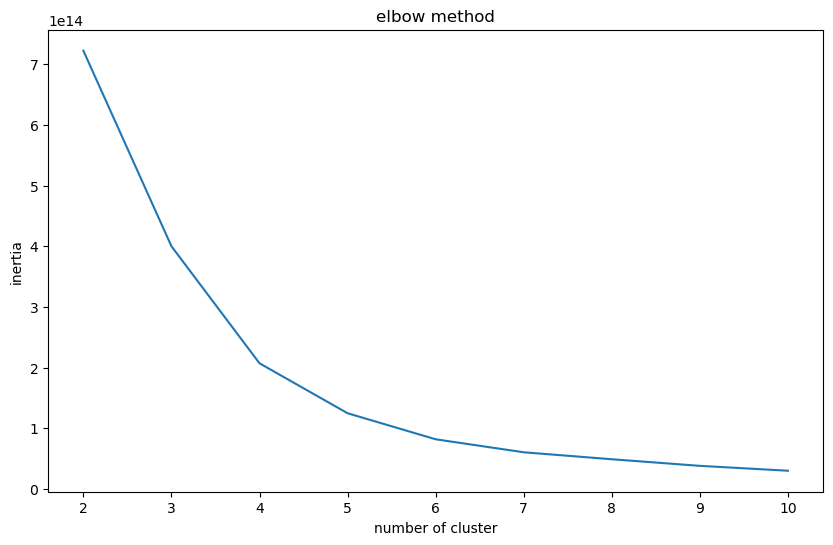

In [46]:
inertia = []
K_range = range(2,11)

for i in K_range :
    Kmeans = KMeans( n_clusters = i , init = 'k-means++' , random_state = 0 )
    Kmeans.fit (RFM_df)
    inertia.append (Kmeans.inertia_)

fig , ax = plt.subplots(figsize=(10, 6))
sns.lineplot (x=K_range , y =inertia , ax = ax )
plt.title ('elbow method')
plt.xlabel('number of cluster')
plt.ylabel('inertia')

plt.show()

### K-Means

In [47]:
km4 = KMeans( n_clusters = 4 , init = 'k-means++' , random_state = 0 )
labels = km4.fit_predict (RFM_df[['CustAccountBalance' ,'TransactionAmount (INR)']])

c:\Users\Heba\anaconda3\envs\heba\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
RFM_df['cluster']=labels

In [49]:
km4.cluster_centers_

array([[5.10063653e+04, 1.35035546e+03],
       [5.10310790e+06, 1.52895356e+03],
       [1.25955977e+06, 2.90149033e+03],
       [1.37869817e+07, 2.95066667e+03]])

In [50]:
km4.predict([[100, 2000], [12000000, 360000000]])

c:\Users\Heba\anaconda3\envs\heba\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 3])

In [51]:
RFM_df['cluster'] = labels

In [52]:
km4.cluster_centers_

array([[5.10063653e+04, 1.35035546e+03],
       [5.10310790e+06, 1.52895356e+03],
       [1.25955977e+06, 2.90149033e+03],
       [1.37869817e+07, 2.95066667e+03]])

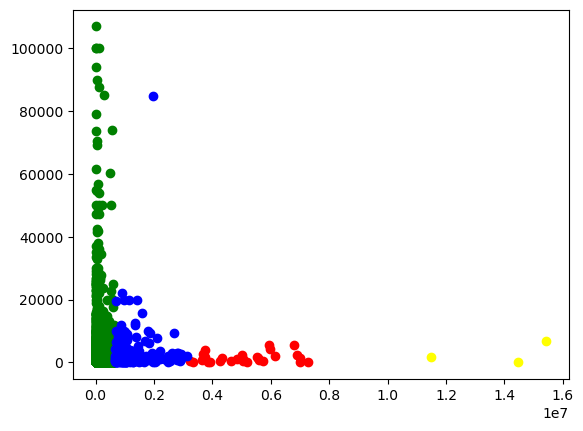

In [53]:

df1= RFM_df [RFM_df.cluster ==0]
df2= RFM_df [RFM_df.cluster ==1]
df3= RFM_df [RFM_df.cluster ==2]
df4= RFM_df [RFM_df.cluster ==3]
#df5= df_scaled [df_scaled.cluster ==4]
#df6= df_scaled [df_scaled.cluster ==5]
#df7= df_scaled [df_scaled.cluster ==6]
#df8= df_scaled [df_scaled.cluster ==7]
plt.scatter(df1['CustAccountBalance'] ,df1['TransactionAmount (INR)'] , color = 'green')
plt.scatter(df2['CustAccountBalance'] ,df2['TransactionAmount (INR)'] , color = 'red')
plt.scatter(df3['CustAccountBalance'] ,df3['TransactionAmount (INR)'] , color = 'blue')
plt.scatter(df4['CustAccountBalance'] ,df4['TransactionAmount (INR)'] , color = 'yellow')
#plt.scatter(df5['CustAccountBalance'] ,df5['TransactionAmount (INR)'] , color = 'pink')
#plt.scatter(df6['Age'] ,df6['TransactionAmount (INR)'] , color = 'black')
#plt.scatter(df7['Age'] ,df7['TransactionAmount (INR)'] , color = 'gray')
#plt.scatter(df8['Age'] ,df8['TransactionAmount (INR)'] , color = 'purple')

In [54]:
RFM_df.cluster.value_counts()

0    9744
2     224
1      29
3       3
Name: cluster, dtype: int64

## <span style='background :White' > <span style='color:Green'> save the model  </span> </span>

In [56]:
#import pickle
#pickle.dump(X_kmeans, open('model.pkl', 'wb'))

In [57]:
#Model_kmeans = pickle.load(open('model.pkl','rb'))
#Model_kmeans.predict(df)